In [1]:
import numpy as np

seed_ = 20200218

np.random.seed(seed_)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


def create_fig(figsize=(8,5), dpi=150):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    return fig

Using TensorFlow backend.


In [2]:
import lightgbm as lgb

In [11]:
df = pd.read_csv('./data/solofpp_train_clean.csv')
df.shape

(536723, 30)

In [12]:
df.drop(labels=['groupId', 'matchType'], axis=1, inplace=True)
df.head()

,Id,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed,winPlacePerc
0,315c96c26c9aac,6dc8ff871e21e6,0,0,100.000,0,0,45,0,1,...,0.00,0,0,49.75,2,0,0.00,49.75,0,0.1875
1,311b84c6ff4390,292611730ca862,0,0,8.538,0,0,48,1000,0,...,0.00,0,0,1089.00,6,1500,0.00,3093.00,0,0.7368
2,b7807186e3f679,2c30ddf481c52d,0,1,324.200,1,5,5,986,4,...,76.84,0,0,2050.00,6,1462,0.25,3354.84,6,0.8750
3,92022479b92ce7,07948d723b9c0f,0,3,254.300,0,12,13,0,2,...,15.29,0,0,1787.00,3,0,0.00,4169.29,15,0.8211
4,47143f942503e0,bc2faecb77e5ec,0,0,136.900,0,0,37,0,1,...,0.00,0,0,270.70,1,0,0.00,270.70,0,0.3474


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Id', 'winPlacePerc', 'numGroups', 'matchId'], axis=1), df['winPlacePerc'], test_size=0.2, random_state=seed_)

X_train.head()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed
475572,0,2,100.0,0,3,27,0,1,1,23.950,...,0,219.90,0,0,811.900,7,0,0.0,1031.8000,5
232000,0,0,130.1,0,0,43,1342,1,1,6.372,...,0,0.00,0,0,151.500,2,1472,0.0,151.5000,0
137292,0,0,0.0,0,0,86,991,0,0,0.000,...,0,0.00,0,0,2.765,0,1477,0.0,2.7650,0
67745,0,4,0.0,0,1,61,0,0,0,0.000,...,0,7.15,0,0,2276.000,3,0,0.0,2283.1618,5
369880,0,0,0.0,0,0,64,0,0,0,0.000,...,0,0.00,0,0,544.600,4,0,0.0,861.1000,0


In [14]:
lgb_params = {
    "num_leaves": 42,
    "objective": "regression",
    "metric": ["mae"],
    "seed": seed_,
}

In [20]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_model = lgb.train(lgb_params, lgb_train)

In [21]:
predicted_y = lgb_model.predict(X_test)

In [22]:
def mae(a, b):
    return np.nanmean( np.abs(a -b) )

In [23]:
mae(predicted_y, y_test)

0.0402119894200623

Text(0, 0.5, 'actual winPlacePerc')

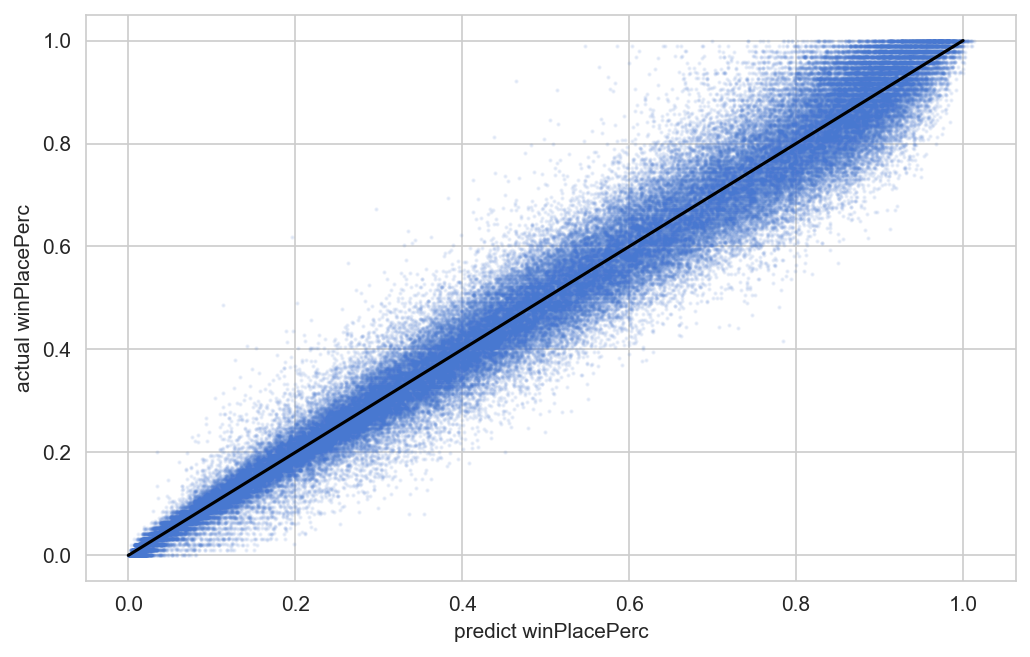

In [24]:
create_fig()
plt.plot(predicted_y, y_test,  'o', alpha=0.1, markersize=1)
sns.lineplot([0, 1], [0, 1], color='k')
plt.xlabel('predict winPlacePerc')
plt.ylabel('actual winPlacePerc')